In [1]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print("✅ Libraries Imported Successfully!")


✅ Libraries Imported Successfully!


In [3]:
# 📂 2. Load Dataset
data = pd.read_csv('Employee_Attrition_Project.csv')  # dataset नाव check करा
print("✅ Data Loaded Successfully!")
print("Rows:", data.shape[0], "| Columns:", data.shape[1])
data.head()


✅ Data Loaded Successfully!
Rows: 1470 | Columns: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# 🧹 3. Data Cleaning & Preprocessing

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Encode categorical columns
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

print("\n✅ Data Cleaning & Encoding completed!")



Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

In [5]:
# 🔍 4. Split Dataset
X = data.drop('Attrition', axis=1)  # features
y = data['Attrition']               # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data split into train and test sets!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



✅ Data split into train and test sets!
Training samples: 1176
Testing samples: 294


In [6]:
# 🧮 5. Build & Train Model

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n✅ Models trained successfully!")


C:\Users\hp986\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Models trained successfully!


In [7]:
# 📊 6. Evaluate Models

# Logistic Regression Evaluation
print("📌 Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred_log), 2))
print("\n------------------------------------\n")

# Random Forest Evaluation
print("📌 Random Forest Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred_rf), 2))


📌 Logistic Regression Results:
Accuracy: 85.71 %
Confusion Matrix:
 [[249   6]
 [ 36   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294

ROC-AUC Score: 0.53

------------------------------------

📌 Random Forest Results:
Accuracy: 86.73 %
Confusion Matrix:
 [[251   4]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294

ROC-AUC Score: 0.54


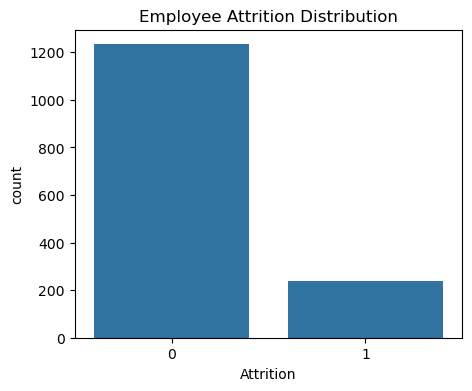

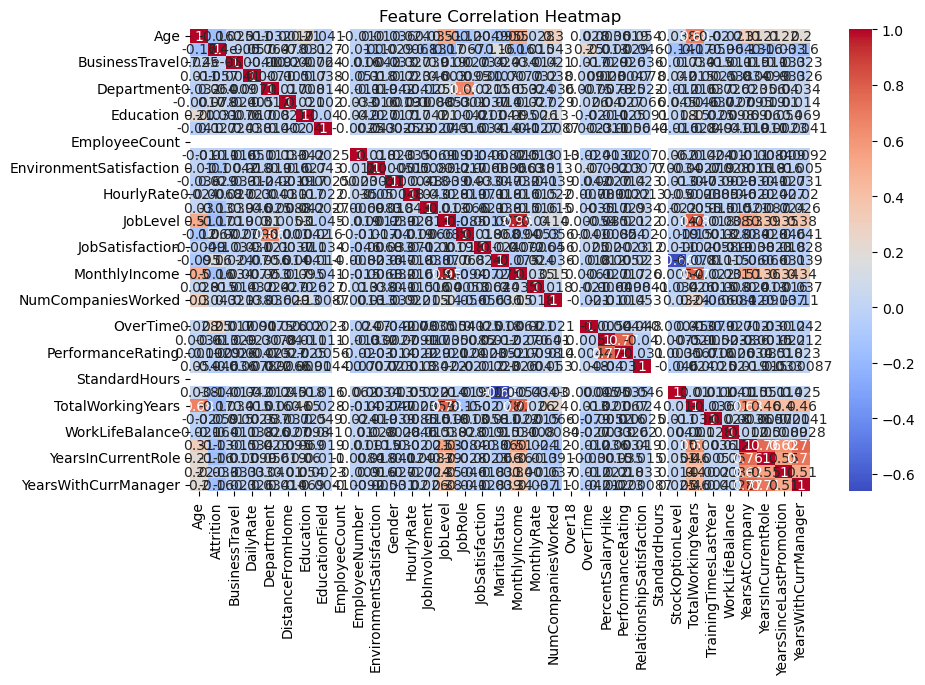

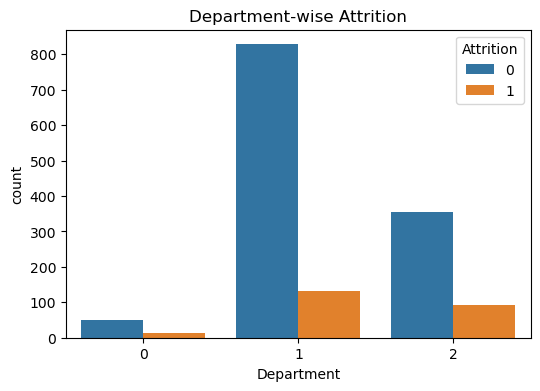


✅ Project Completed Successfully!


In [8]:
# 📉 7. Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Attrition Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=data)
plt.title('Employee Attrition Distribution')
plt.show()

# 2️⃣ Feature Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3️⃣ Department-wise Attrition
if 'Department' in data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Department', hue='Attrition', data=data)
    plt.title('Department-wise Attrition')
    plt.show()

print("\n✅ Project Completed Successfully!")
